<a href="https://colab.research.google.com/github/Rakshit171297/Predict-Diabetes/blob/main/predict_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes=pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("dimension  of the data: {}".format(diabetes.shape))

dimension  of the data: (768, 9)


In [5]:
#grouping data based on outcome
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


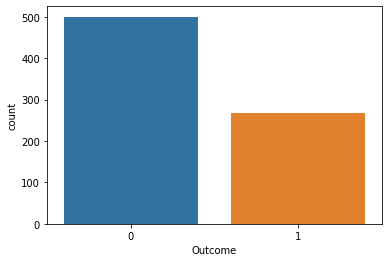

In [6]:
import seaborn as sns
sns.countplot(diabetes['Outcome'], label="Count")

In [7]:
# some information of our data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


K-Nearest Neighbours to Predict Diabetes

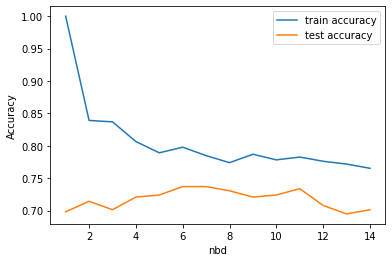

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'], diabetes['Outcome'], random_state=80, train_size=.6)

from sklearn.neighbors import KNeighborsClassifier

train_accuracy=[]
test_accuracy=[]

nbd=range(1,15)

for n_nbd in nbd:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_nbd)
    knn.fit(x_train, y_train)
    
    #record the accuracy 
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.plot(nbd, train_accuracy, label="train accuracy")
plt.plot(nbd, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("nbd")

plt.legend()

In [9]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.782608695652174
0.7337662337662337



Decision Tree Classifier to Predict Diabetes

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

1.0
0.6883116883116883


In [11]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)

print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

0.7913043478260869
0.7532467532467533


Feature Importance in Decision Trees

In [13]:
print(tree.feature_importances_)

[0.04598683 0.64752304 0.         0.         0.         0.24454402
 0.06194612 0.        ]


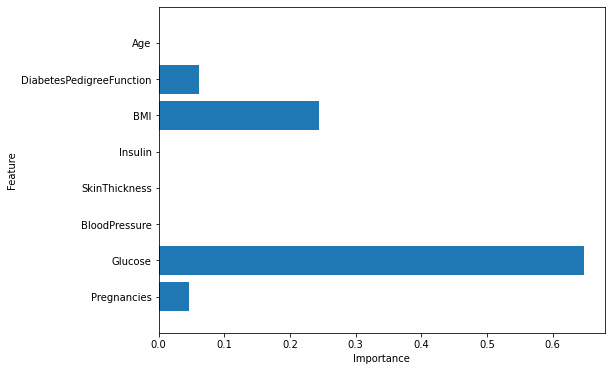

In [14]:

diabetes_features=diabetes.loc[:,diabetes.columns!='Outcome']
def plot_FI(model):
    plt.figure(figsize=(8,6))
    features=8
    plt.barh(range(features),model.feature_importances_)
    plt.ylabel("Feature")
    plt.xlabel("Importance")
    plt.yticks(np.arange(features), diabetes_features)
    
    plt.ylim(-1,features)

plot_FI(tree)


Deep Learning to Predict Diabetes

In [15]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=45)

mlp.fit(x_train, y_train)

print(mlp.score(x_train, y_train))
print(mlp.score(x_test, y_test))

0.7717391304347826
0.7045454545454546


In [16]:

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.fit_transform(x_test)

mlp=MLPClassifier(random_state=0)

mlp.fit(x_train_scale, y_train)

print(mlp.score(x_train_scale, y_train))
print(mlp.score(x_test_scale, y_test))

0.8152173913043478
0.775974025974026


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


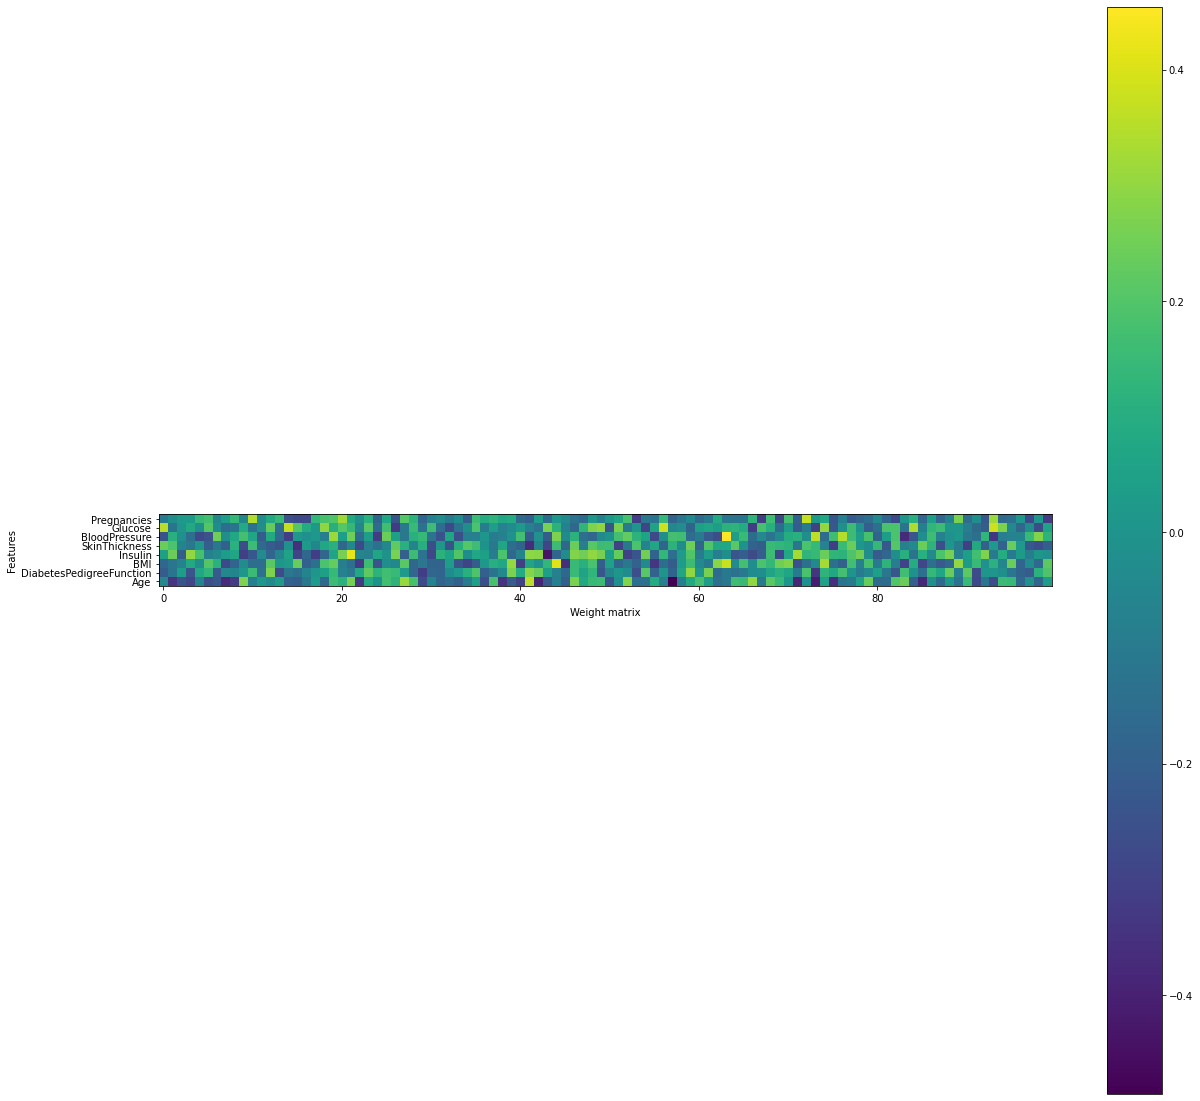

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')

plt.yticks(range(8),diabetes_features)
plt.xlabel("Weight matrix")
plt.ylabel("Features")

plt.colorbar()